<a href="https://colab.research.google.com/github/debsdamaso/AI/blob/main/Copy_of_EstudodeCaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo de negócio: um modelo preditivo capaz de estimar o preço final de casas residenciais em Ames, Iowa, com base em um conjunto de 79 variáveis explicativas. O texto sugere que o preço de venda de uma casa não é influenciado apenas pelo número de quartos ou características básicas como uma cerca branca, mas por uma ampla gama de fatores que descrevem praticamente todos os aspectos das residências.

O desafio proposto: construir um modelo estatístico ou algorítmico que possa capturar a complexidade das relações entre essas 79 variáveis explicativas e o preço final das casas.

Isso poderia ser útil para diversas finalidades, tais como:

Mercado Imobiliário: Compreender melhor os fatores que afetam os preços das casas pode ajudar corretores imobiliários, construtores e investidores a tomar decisões mais informadas sobre precificação, investimento e estratégias de marketing.

Compradores e Vendedores: Tanto compradores quanto vendedores podem se beneficiar de uma estimativa mais precisa do preço final de uma casa. Compradores podem fazer escolhas mais embasadas, e vendedores podem ajustar suas expectativas e estratégias de venda.

Avaliação de Risco: Instituições financeiras e empresas de seguros podem usar esse tipo de modelo para avaliar riscos associados a empréstimos hipotecários, planejamento financeiro e gestão de portfólio.

Desenvolvimento Urbano: Planejadores urbanos e governos locais podem usar esses modelos para entender melhor como diferentes variáveis afetam os preços das casas e, assim, tomar decisões mais informadas sobre zoneamento, desenvolvimento de infraestrutura e políticas habitacionais.

Pesquisa de Mercado: Empresas que atuam no setor imobiliário podem usar esses modelos para obter insights sobre as preferências dos compradores e as características mais valorizadas em um imóvel.

No geral, o objetivo é usar a análise de dados e técnicas de modelagem para compreender e quantificar o impacto das várias variáveis explicativas no preço das casas, permitindo uma melhor tomada de decisão e uma compreensão mais profunda do mercado imobiliário em Ames, Iowa.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##Exercicio 1:

Escolher uma coluna numérica, entender a descrição dela

Calcular média, median

In [ ]:
media_LotArea = df['LotArea'].mean()
print(f'A média da coluna é: {media_LotArea}')
median_LotArea = df['LotArea'].median()
print(f'A mediana da coluna é: {median_LotArea}')

A média da coluna é: 10516.828082191782
A mediana da coluna é: 9478.5


##Exercicio 2

Escolher uma coluna categorica e entender a descrição dela

Construir um histograma com o PANDAS


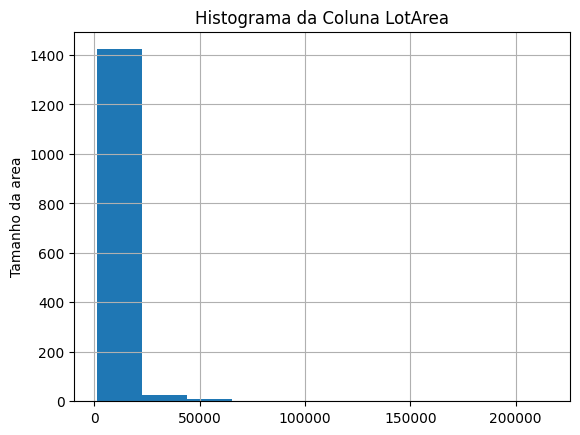

In [ ]:
df.describe(include=object)

df['LotArea'].hist(bins=10)  # 'bins' define o número de barras no histograma, pode deixar () se quiser
plt.ylabel('Tamanho da area')
plt.title('Histograma da Coluna LotArea')
plt.show()

<Axes: >

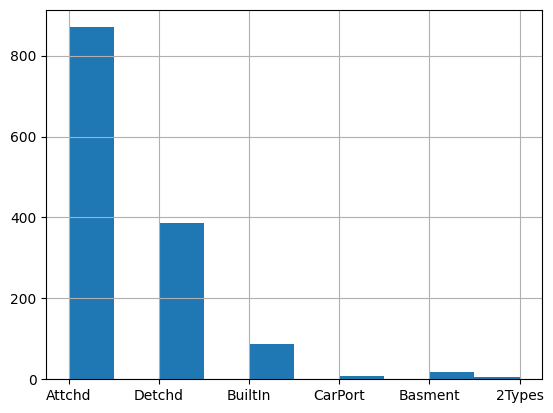

In [ ]:
df['GarageType'].hist()

## PERGUNTAS IMPORTANTES DO DATA UNDERSTANDING

1. Existem dados nulos ou faltantes no Dataset, conjunto de dados?
2. Quais os tipos de dados existem no Dataset?
Exemplo Coluna ID -> Int, Coluna Street -> Object
3. Existe alguma coluna que está com o tipo de dado errado?

In [ ]:
# 1. Dados nulos
# Quando você chama a função .isnull() em um DataFrame do Pandas,
# ela retorna uma matriz booleana em que cada célula é True se o valor for nulo (NaN)
# e False se o valor não for nulo.
valores_nulos = df.isnull()
print(valores_nulos)

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [ ]:
# 2. Tipos de dados:
tipos_de_dados = df.dtypes
print(tipos_de_dados)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [ ]:
# 3. Existem dados errados?

# Resposta: apenas o ID, no qual não faz sentido ser int, mas seria string ou object

PERGUNTAS IMPORTANTES DO DATA UNDERSTANDING

4. Quais os tipos únicos de vendas que existem?
5. Quais os tipo únicos de condições de venda?
6. Qual o tipo de condição de venda que tem maior valor de venda das casas?

In [ ]:
# 4. Tipos unicos de vendas
valores_unicos = df['SaleType'].unique()
print("Os valores unicos são:")
print(valores_unicos)

# contagem
contagem_tipos_de_venda = df['SaleType'].value_counts()
print("\nA contagem  dos valores é:")
print(contagem_tipos_de_venda)

Os valores unicos são:
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']

A contagem  dos valores é:
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


As condições únicas são:
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']

A contagem  dos valores é:
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


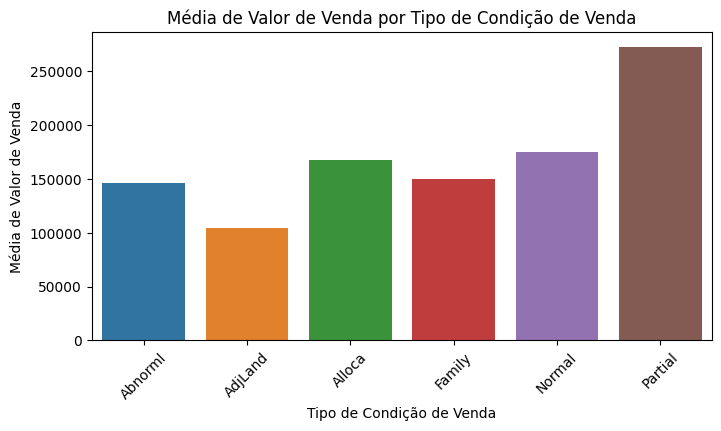

In [ ]:
# 5. Tipos unicos de condições de vendas
condicoes_vendas = df['SaleCondition'].unique()
print("As condições únicas são:")
print(condicoes_vendas)

# contagem
contagem_condicoes = df['SaleCondition'].value_counts()
print("\nA contagem  dos valores é:")
print(contagem_condicoes)

# 6. Agrupar por tipo de condição de venda e calcular a média dos valores de venda
media_valores_venda_por_condicao = df.groupby('SaleCondition')['SalePrice'].mean()

# 6. Criar gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x=media_valores_venda_por_condicao.index, y=media_valores_venda_por_condicao)
plt.xticks(rotation=45)
plt.xlabel('Tipo de Condição de Venda')
plt.ylabel('Média de Valor de Venda')
plt.title('Média de Valor de Venda por Tipo de Condição de Venda')
plt.show()


  DATA PREPARATION

  ## RESOLVENDO DADOS FALTANTES E NULOS

  Exercicio 1: Qual colunas tem dados faltantes?
  Exercicio 2: Qual a % de dados faltantes nas colunas?

In [ ]:
columns_with_missing_data = df.columns[df.isnull().any()]
print("Colunas com dados faltantes:", columns_with_missing_data)

Colunas com dados faltantes: Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [ ]:
# Calculando a porcentagem de valores faltantes em cada coluna
porcentagem_faltantes = (df.isnull().sum() / len(df)) * 100
porcentagem_faltantes = porcentagem_faltantes[porcentagem_faltantes > 0].round(2)

print("Porcentagem de valores faltantes em cada coluna:")
print(porcentagem_faltantes)

Porcentagem de valores faltantes em cada coluna:
LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


In [ ]:
# outro modo de calcular
for i in columns_with_missing_data:
  porcentagem = (df[i].isnull().sum()/df.shape[0])*100
  print('Coluna:', i, porcentagem)

Coluna: LotFrontage 17.73972602739726
Coluna: Alley 93.76712328767123
Coluna: MasVnrType 0.547945205479452
Coluna: MasVnrArea 0.547945205479452
Coluna: BsmtQual 2.5342465753424657
Coluna: BsmtCond 2.5342465753424657
Coluna: BsmtExposure 2.6027397260273974
Coluna: BsmtFinType1 2.5342465753424657
Coluna: BsmtFinType2 2.6027397260273974
Coluna: Electrical 0.0684931506849315
Coluna: FireplaceQu 47.26027397260274
Coluna: GarageType 5.5479452054794525
Coluna: GarageYrBlt 5.5479452054794525
Coluna: GarageFinish 5.5479452054794525
Coluna: GarageQual 5.5479452054794525
Coluna: GarageCond 5.5479452054794525
Coluna: PoolQC 99.52054794520548
Coluna: Fence 80.75342465753424
Coluna: MiscFeature 96.30136986301369


Exercicio 3: escolher 4 colunas que tem dados faltantes .

Para cada coluna, criar uma hipotese de como lidar com dados faltantes.

PoolQC -> Nem toda casa tem piscina, logo nem toda casa tem qualidade da piscina. -> COMPLETAR TODAS AS LINHAS COM PoolQC faltando com algum valor que represente 0 ou a falta do dado.

Eletrical -> Quantidade de dados faltando é muito baixa, mais fácil deletar TODAS as linhas que Eletrical está Nulo.

Alley -> Nem toda casa tem beco ou entrada por um beco -> COMPLETAR TODAS AS LINHAS COM PoolQC faltando com algum valor que represente 0 ou a falta do dado.

LotFrontage -> Muitos bairros tem a mesma fachada para todas as casas e tamanhos de frente iguais. COMPLETAR TODAS OS DADOS FALTANTES de LotFrontage com o valor de LotFrontage daquele bairro.

Exercicio 5: Executar mudanças nas colunas acima.


In [ ]:
# Selecionar as colunas com dados faltantes que você deseja preencher
columns_to_fill = ['PoolQC', 'Alley']

# Preencher os valores faltantes em cada coluna com 0
for column in columns_to_fill:
    df[column].fillna(0, inplace=True)

In [ ]:
# Selecionar a coluna da qual você deseja deletar as linhas nulas
column_to_drop_nans = 'Electrical'

# Deletar as linhas nulas na coluna específica
df.dropna(subset=[column_to_drop_nans], inplace=True)

In [ ]:
# O do LotFrontage substitui pelo valor de LotFrontage do bairro
coluna_Lot = df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Verificar se ainda há valores nulos após a remoção
print("Valores faltantes:")
print(df.isnull().sum())

Valores faltantes:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [ ]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [ ]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [ ]:
df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)